In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import shap
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [101]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
data.head(12)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [103]:
data.dropna

<bound method DataFrame.dropna of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

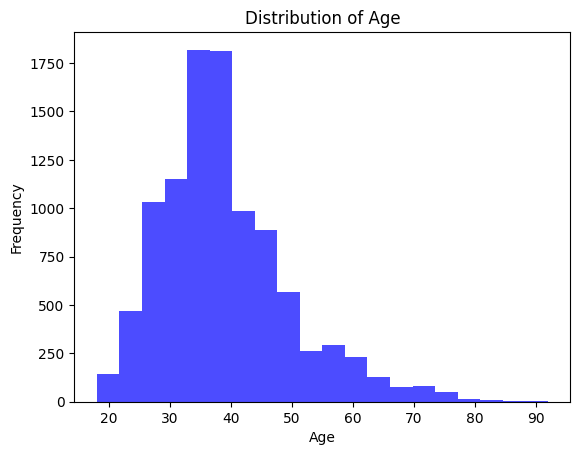

In [104]:
plt.hist(data['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

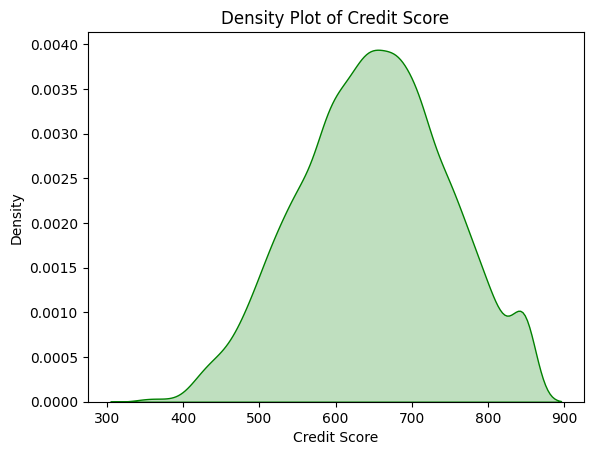

In [105]:
sns.kdeplot(data['CreditScore'], fill=True, color='green')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Density Plot of Credit Score')
plt.show()

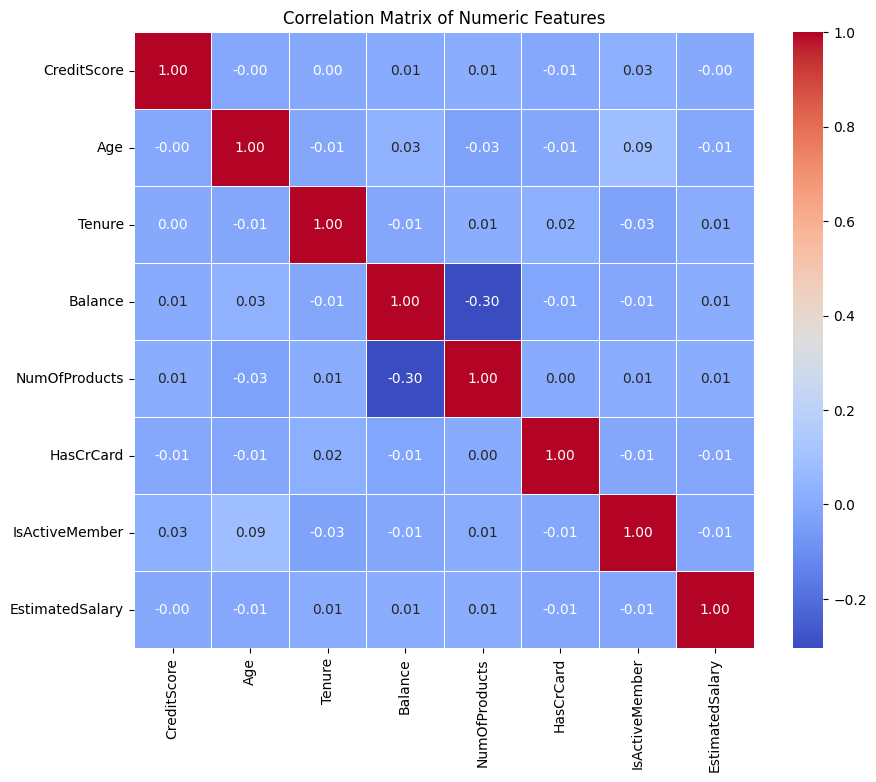

In [106]:
# Assuming X contains your numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [107]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True


In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [109]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [110]:
X_train_scaled[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 ,  1.72572313, -0.57638802,
        0.91324755])

In [111]:
rf_model = RandomForestClassifier(random_state=30)
xgb_model = XGBClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)

In [112]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [113]:
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [114]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [115]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [116]:
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    classification_rep = classification_report(y_val, y_pred,zero_division=1)
    return accuracy, roc_auc, classification_rep


rf_accuracy, rf_roc_auc, rf_classification_report = evaluate_model(rf_model, X_test, y_test)
xgb_accuracy, xgb_roc_auc, xgb_classification_report = evaluate_model(xgb_model, X_test, y_test)
lr_accuracy, lr_roc_auc, lr_classification_report = evaluate_model(lr_model, X_test, y_test)
svm_accuracy, svm_roc_auc, svm_classification_report = evaluate_model(svm_model, X_test, y_test)


evaluation_results = {
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "ROC AUC": rf_roc_auc,
        "Classification Report": rf_classification_report,
    },
    "XGBoost": {
        "Accuracy": xgb_accuracy,
        "ROC AUC": xgb_roc_auc,
        "Classification Report": xgb_classification_report,
    },
    "Logistic Regression": {
        "Accuracy": lr_accuracy,
        "ROC AUC": lr_roc_auc,
        "Classification Report": lr_classification_report,
    },
    "SVM": {
        "Accuracy": svm_accuracy,
        "ROC AUC": svm_roc_auc,
        "Classification Report": svm_classification_report,
    },
}


In [117]:
for resultmodel in evaluation_results:
    print(resultmodel, " Aaccuracy :", evaluation_results[resultmodel]["Accuracy"])
    print(resultmodel ," ROC AUC:", evaluation_results[resultmodel]["ROC AUC"])
    print(resultmodel, " Classification Report:\n", evaluation_results[resultmodel]["Classification Report"])
    print("="*50)

Random Forest  Aaccuracy : 0.865
Random Forest  ROC AUC: 0.7189617307232512
Random Forest  Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

XGBoost  Aaccuracy : 0.858
XGBoost  ROC AUC: 0.7203725431517012
XGBoost  Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Logistic Regression  Aaccuracy : 0.8005
Logistic Regression  ROC AUC: 0.5250446915609349
Logistic Regression  Classification Report:
 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


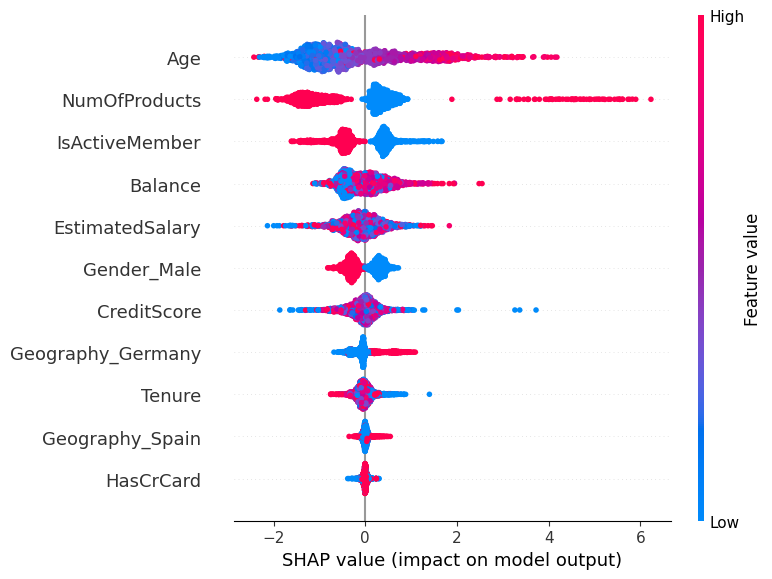

<Figure size 640x480 with 0 Axes>

In [118]:
# Create a SHAP explainer for your model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for a sample of data (e.g., X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig('shap_summary_plot.png', bbox_inches='tight')

In [119]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_scaled, mode="classification")

In [120]:
# Select a specific prediction to explain (e.g., the first one)
prediction_to_explain = xgb_model.predict_proba(X_test.iloc[[0]])

# Explain the prediction
explanation = explainer.explain_instance(X_test.iloc[0], xgb_model.predict_proba)


In [121]:
explanation.show_in_notebook()
